In [2]:
import vk_api
import time
from tqdm import tnrange, tqdm_notebook, tqdm
import settings

In [5]:
def two_factor_handler():
    code = input()
    remember_device = False
    return code, remember_device

# vk_session = vk_api.VkApi(settings.login, settings.password, auth_handler=two_factor_handler)
vk_session = vk_api.VkApi(settings.login,token='05682aaa55685bc00d8ca276fd0d71398398041487d8e174cb5f8a112c742351e27ec21cd604f447a76cf')

vk_session.auth()

vk = vk_session.get_api()
conversation_name = "Come back🥖🥖🥖"

In [7]:
confs = vk.messages.getConversations(count=200)
confs = list(filter(lambda c: c['conversation']['peer']['type']=='chat',confs['items']))
dict_confs = {}

# print(confs)

count_confs = len(confs)
for i in range(0, count_confs):
    chat_settings = confs[i]['conversation']['chat_settings']
#     print(chat_settings['title'])
    try:
        dict_confs[chat_settings['title']] = chat_settings['members_count']
    except KeyError:
        dict_confs[chat_settings['title']] = ''
print(dict_confs)
# print(len(dict_confs))

{'GIRYA': 45, 'Come back🥖🥖🥖': 4, 'Бадминтон': 38, 'Dagestan BMSTU': 40, '🔥РТ5-51🔥': 26, 'РТ5-51 (Официальная информация)': 26, 'Два пидора': '', 'Сегодня 🍾🍾🍾': '', 'ManSpreading': 2, 'БЕЗ ФЛУДА DAG BMSTU': 29, 'Подсечка': 4, '🙃': 7, 'Досуг РТ5🎉': 15, 'ОТВЕТЫ ЭЛЕКТРОНИКА': 7, '13:00 у дома быта': 8}


In [13]:
def take_messages(q, sleep_time=0.3):
    convers = vk.messages.searchConversations(q=q)
    convers_id = convers["items"][0]["peer"]['id']
    time.sleep(sleep_time)
    
    convers_len = vk.messages.getHistory(user_id=convers_id, count=0)['count']
    time.sleep(sleep_time)
    
    if convers_len > 200:
        conv_history = []
#         prev_len = 0
        pbar = tqdm_notebook(total=convers_len)
        
        resid = convers_len
        offset = 0
        
        while resid > 0:
            req = vk.messages.getHistory(user_id=convers_id, count=200, offset=offset)
            # работает правильно только если в сообщении не больше одного аттачмента
            # в ином случае он просто игнорирует все, кроме первого
#             if len(conv_history) >= prev_len:
#                 print('differ: {}'.format(len(conv_history) - prev_len))
            prev_len = len(conv_history)
            for i, r in enumerate(req['items']):
                ret_list = (req['items'][i]['from_id'], req['items'][i]['text'],
                           req['items'][i]['attachments'][0]['type'] if req['items'][i]['attachments'] else '')
                conv_history.append(ret_list)
            time.sleep(sleep_time)
            resid -= 200
            offset += 200
            pbar.update(200)
        pbar.close()
    return conv_history

In [14]:
all_messages = take_messages(conversation_name, sleep_time=0)

In [15]:
print(len(all_messages))

6045


In [16]:
message_set = {}
for m in all_messages:
    if m[0] not in message_set:
        message_set[m[0]] = 1
    else:
        message_set[m[0]] += 1

In [17]:
new_ms = {}
for i in message_set:
    req = vk.users.get(user_ids=i)[0]
#     time.sleep(0.3)
    new_ms[req['first_name'] + " " + req["last_name"]] = message_set[i]

In [18]:
# import operator
# # for i, v in new_ms.items():
# #     print("{}\t{}".format(i,v))
# print(sorted(new_ms.items(), key=operator.itemgetter(1), reverse=True))

                     amount_of_messages
Муса Шахрудинил                    1764
Ємир Наврузов                      1679
Мага Кантулаев                     1586
Джамал Абдулбасиров                1016


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac99e03240>],
      dtype=object)

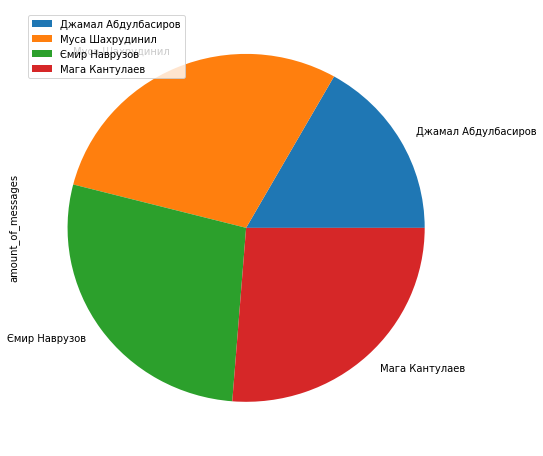

In [25]:
import pandas as pd

df = pd.DataFrame(list(new_ms.values()), index=map(str, list(new_ms.keys())), columns=['amount_of_messages'])

print(df.sort_values(['amount_of_messages'],ascending=False).head(50))

df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [23]:
import re
# http://localhost:8000/#access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456

full_path = 'http://localhost:8000/#access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456'
print(full_path[23:].split('#'))
fragment = {}
for i in full_path[23:].split('&'):
    fragment[i.split('=')[0]] = i.split('=')[1] 
print(fragment)

['access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456']
{'access_token': '49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414', 'expires_in': '86400', 'user_id': '170285902', 'state': '123456'}
